In [2]:
import os    
#os.environ['THEANO_FLAGS'] = "device=gpu1"  
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32,lib.cnmem=1"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32"
import theano
import numpy as np
from keras.layers import Input, Dense, convolutional,Reshape, Flatten
from keras.models import Model
from keras.optimizers import *

from sklearn.cross_validation import train_test_split

%matplotlib inline






Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)
Using Theano backend.
/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
# this is our input placeholder
input_img = Input(shape=(3,32,32))

x = convolutional.Convolution2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x)
x = convolutional.Convolution2D(20, 3, 3, activation='relu', border_mode='same')(x)
x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x)
x = convolutional.Convolution2D(20, 3, 3, activation='relu', border_mode='same')(x)
x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x)
x = convolutional.Convolution2D(20, 3, 3, activation='relu', border_mode='same')(x)
x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x)
encoded =Flatten()(x)
decoded = Dense(3072, activation='linear')(encoded)
decoded = Reshape((3,32,32))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
#autoencoder.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy') #around 35.47% test accuracy
###->autoencoder.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #around 40% test accuracy
#autoencoder.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy') #around 10% test accuracy
#autoencoder.compile(optimizer=Adam(lr=0.002), loss='categorical_crossentropy') #around 10% test accuracy

In [57]:
print (autoencoder.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_7 (InputLayer)             (None, 3, 32, 32)     0                                            
____________________________________________________________________________________________________
convolution2d_25 (Convolution2D) (None, 16, 32, 32)    448         input_7[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_25 (MaxPooling2D)   (None, 16, 16, 16)    0           convolution2d_25[0][0]           
____________________________________________________________________________________________________
convolution2d_26 (Convolution2D) (None, 20, 16, 16)    2900        maxpooling2d_25[0][0]            
___________________________________________________________________________________________

In [5]:
X_train=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/X_train.npy')
X_test=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/X_test.npy')
y_train=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/y_train.npy')
y_test=np.load('/media/mrafi123/UStore/Dimensionality-Reduction/data/CIFAR10/y_test.npy')

In [39]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [40]:
x_train = X_train.astype('float32') / 255.
x_test = X_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(50000, 3072)
(10000, 3072)


In [41]:
x_train = x_train.reshape((len(x_train),3,32,32))
x_test = x_test.reshape((len(x_test),3,32,32))
print (x_train.shape)
print (x_test.shape)

(50000, 3, 32, 32)
(10000, 3, 32, 32)


In [43]:
noise_factor = 0.2
s_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
s_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

s_train_noisy = np.clip(s_train_noisy, 0., 1.)
s_test_noisy = np.clip(s_test_noisy, 0., 1.)

print(s_train_noisy.shape)
print(s_test_noisy.shape)

(50000, 3, 32, 32)
(10000, 3, 32, 32)


In [58]:
autoencoder.fit(s_train_noisy, x_train,
            nb_epoch=10,
            batch_size=256,
            shuffle=True,
            validation_data=(s_test_noisy, x_test)
            )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 61s - loss: 2.9783 - acc: 0.0331 - val_loss: 2.5499 - val_acc: 0.0415
Epoch 2/10
50000/50000 [==============================] - 61s - loss: 2.4197 - acc: 0.0421 - val_loss: 2.3589 - val_acc: 0.0446
Epoch 3/10
50000/50000 [==============================] - 61s - loss: 2.3012 - acc: 0.0463 - val_loss: 2.2837 - val_acc: 0.0469
Epoch 4/10
50000/50000 [==============================] - 61s - loss: 2.2492 - acc: 0.0474 - val_loss: 2.2408 - val_acc: 0.0479
Epoch 5/10
50000/50000 [==============================] - 61s - loss: 2.2081 - acc: 0.0472 - val_loss: 2.1961 - val_acc: 0.0480
Epoch 6/10
50000/50000 [==============================] - 61s - loss: 2.1642 - acc: 0.0472 - val_loss: 2.1603 - val_acc: 0.0478
Epoch 7/10
50000/50000 [==============================] - 61s - loss: 2.1243 - acc: 0.0477 - val_loss: 2.1072 - val_acc: 0.0458
Epoch 8/10
50000/50000 [==============================

In [59]:
reconstructed_test_imgs = autoencoder.predict(x_test)


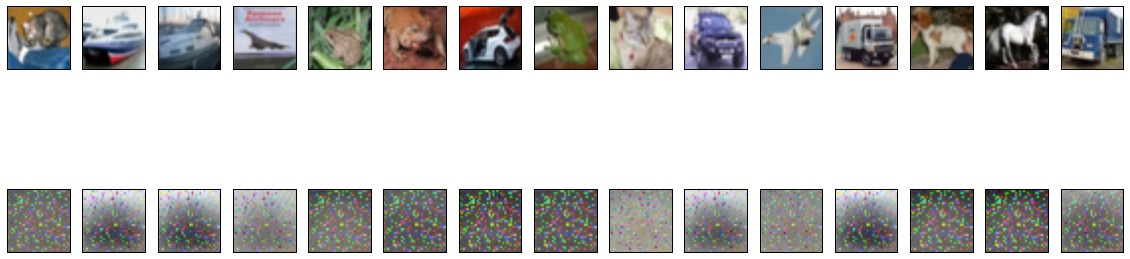

In [60]:
import matplotlib.pyplot as plt

n = 15  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(encoded_imgs[i].reshape(6, 6))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
   
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_test_imgs[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [61]:
#encoded =Flatten()(encoded)
encoded = Dense(300, activation='linear')(encoded)
encoder = Model(input_img, encoded)
    

In [62]:
print (encoder.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_7 (InputLayer)             (None, 3, 32, 32)     0                                            
____________________________________________________________________________________________________
convolution2d_25 (Convolution2D) (None, 16, 32, 32)    448         input_7[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_25 (MaxPooling2D)   (None, 16, 16, 16)    0           convolution2d_25[0][0]           
____________________________________________________________________________________________________
convolution2d_26 (Convolution2D) (None, 20, 16, 16)    2900        maxpooling2d_25[0][0]            
___________________________________________________________________________________________

In [63]:
encoded_train_imgs = encoder.predict(x_train)
print (encoded_train_imgs.size)
print (encoded_train_imgs.shape)
print (encoded_train_imgs.nbytes)

15000000
(50000, 300)
120000000


In [64]:
encoded_test_imgs = encoder.predict(x_test)
print (encoded_test_imgs.size)
print (encoded_test_imgs.shape)
print (encoded_test_imgs.nbytes)

3000000
(10000, 300)
24000000


In [65]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
clf = clf.fit(encoded_train_imgs, y_train)

In [66]:
y_pred = clf.predict(encoded_test_imgs)


In [67]:
num=len(encoded_test_imgs)
r=0
w=0
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(y_pred[i],y_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  2186 wrong:  7814 error rate:  78.14 %
got correctly  21.86 %
